### Importación de datos



In [63]:
import pandas as pd
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

#1. Análisis de facturación



In [64]:
total_t1 = tienda["Precio"].sum()
total_t2 = tienda2["Precio"].sum()
total_t3 = tienda3["Precio"].sum()
total_t4 = tienda4["Precio"].sum()

In [65]:
print(f"--- Ingresos totales por tienda ---\n")

print("Tienda 1:", total_t1)
print("Tienda 2:", total_t2)
print("Tienda 3:", total_t3)
print("Tienda 4:", total_t4)

--- Ingresos totales por tienda ---

Tienda 1: 1150880400.0
Tienda 2: 1116343500.0
Tienda 3: 1098019600.0
Tienda 4: 1038375700.0


# 2. Ventas por categoría

In [66]:
print(f"\n------ Ventas por categoria ------")

tiendas = {
    "Tienda 1": tienda,
    "Tienda 2": tienda2,
    "Tienda 3": tienda3,
    "Tienda 4": tienda4
}


------ Ventas por categoria ------


In [67]:
for nombre, df in tiendas.items():
    print(f"\n--- {nombre} ---")
    categorias = (
        df.groupby("Categoría del Producto")["Categoría del Producto"]
        .count()
        .reset_index(name="Cantidad")
        .sort_values(by="Cantidad", ascending=False)
        .head(3)   #  Solo las 3 mas populares
    )
    print(categorias)


--- Tienda 1 ---
  Categoría del Producto  Cantidad
7                Muebles       465
3           Electrónicos       448
5               Juguetes       324

--- Tienda 2 ---
  Categoría del Producto  Cantidad
7                Muebles       442
3           Electrónicos       422
5               Juguetes       313

--- Tienda 3 ---
  Categoría del Producto  Cantidad
7                Muebles       499
3           Electrónicos       451
5               Juguetes       315

--- Tienda 4 ---
  Categoría del Producto  Cantidad
7                Muebles       480
3           Electrónicos       451
5               Juguetes       338


# 3. Calificación promedio de la tienda


In [68]:
print(f"\n------- Calificacion media -------\n")

for nombre, df in tiendas.items():
    promedio = df["Calificación"].mean()
    print(f"{nombre}: {promedio:.2f}")


------- Calificacion media -------

Tienda 1: 3.98
Tienda 2: 4.04
Tienda 3: 4.05
Tienda 4: 4.00


# 4. Productos más y menos vendidos

In [69]:
print(f"\n------ Productos mas vendidos ------")

for nombre, df in tiendas.items():
    print(f"\n--- {nombre} ---")
    categorias = (
        df.groupby("Producto")["Producto"]
        .count()
        .reset_index(name="Cantidad")
        .sort_values(by="Cantidad", ascending=False)
        .head(3)
    )
    print(categorias)


------ Productos mas vendidos ------

--- Tienda 1 ---
         Producto  Cantidad
1         Armario        60
48  TV LED UHD 4K        60
33     Microondas        60

--- Tienda 2 ---
                     Producto  Cantidad
24  Iniciando en programación        65
33                 Microondas        62
7                     Batería        61

--- Tienda 3 ---
           Producto  Cantidad
27    Kit de bancas        57
31  Mesa de comedor        56
11        Cama king        56

--- Tienda 4 ---
      Producto  Cantidad
10    Cama box        62
15  Cubertería        59
11   Cama king        56


In [70]:
print(f"\n----- Productos menos vendidos -----")

for nombre, df in tiendas.items():
    print(f"\n--- {nombre} ---")
    categorias = (
        df.groupby("Producto")["Producto"]
        .count()
        .reset_index(name="Cantidad")
        .sort_values(by="Cantidad", ascending=False)
        .tail(3)
    )
    print(categorias)


----- Productos menos vendidos -----

--- Tienda 1 ---
                     Producto  Cantidad
37            Olla de presión        35
13               Celular ABXY        33
4   Auriculares con micrófono        33

--- Tienda 2 ---
           Producto  Cantidad
23        Impresora        34
31  Mesa de comedor        34
26    Juego de mesa        32

--- Tienda 3 ---
                   Producto  Cantidad
33               Microondas        36
42             Set de vasos        36
9   Bloques de construcción        35

--- Tienda 4 ---
              Producto  Cantidad
21   Guitarra acústica        37
1              Armario        34
22  Guitarra eléctrica        33


# 5. Envío promedio por tienda

In [71]:
print(f"\n-- Costo de envio promedio por tienda --\n")

for nombre, df in tiendas.items():
    envio = df["Costo de envío"].mean()
    print(f"{nombre}: {envio:.2f}")

    tienda.head()


-- Costo de envio promedio por tienda --

Tienda 1: 26018.61
Tienda 2: 25216.24
Tienda 3: 24805.68
Tienda 4: 23459.46


Graficos

In [72]:
# Se preparan las metricas
nombres = []
ingresos = []
calificaciones = []
costos_envio = []

for nombre, df in tiendas.items():
    nombres.append(nombre)
    ingresos.append(df["Precio"].sum())
    calificaciones.append(df["Calificación"].mean())
    costos_envio.append(df["Costo de envío"].mean())

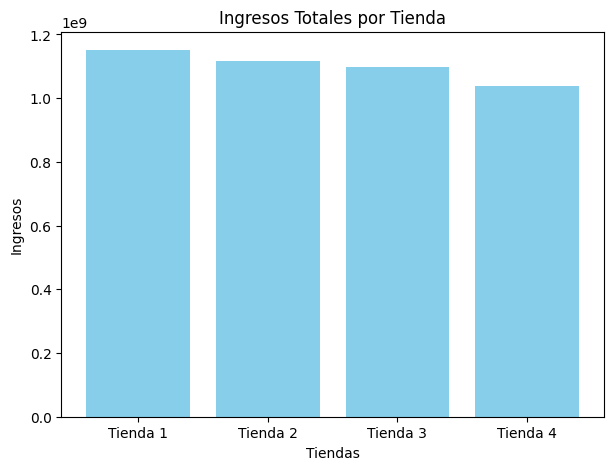

In [73]:
# --- Gráfico 1: Barras para los ingresos totales ---
plt.figure(figsize=(7,5))
plt.bar(nombres, ingresos, color="skyblue")
plt.title("Ingresos Totales por Tienda")
plt.ylabel("Ingresos")
plt.xlabel("Tiendas")
plt.show()

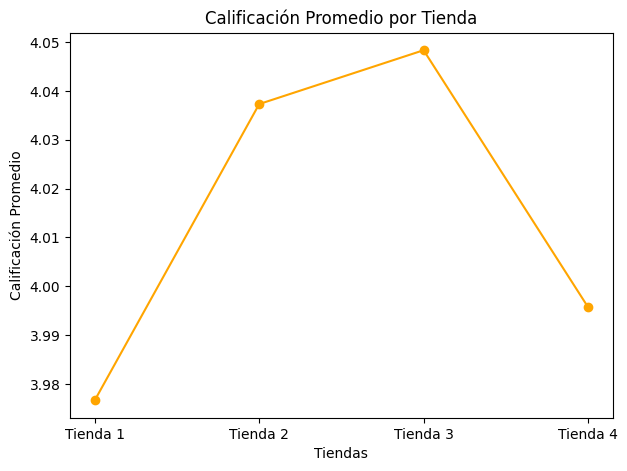

In [74]:
# --- Gráfico 2: Líneas para el promedio de calificación ---
plt.figure(figsize=(7,5))
plt.plot(nombres, calificaciones, marker="o", linestyle="-", color="orange")
plt.title("Calificación Promedio por Tienda")
plt.ylabel("Calificación Promedio")
plt.xlabel("Tiendas")
plt.show()

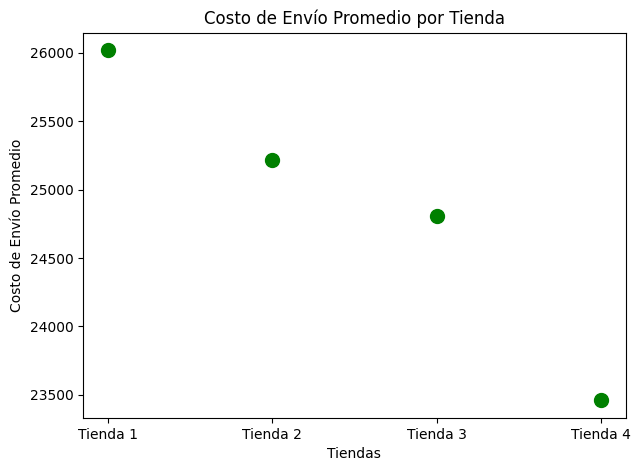

In [75]:
# --- Gráfico 3: Dispersión para los costos de envío promedio ---
plt.figure(figsize=(7,5))
plt.scatter(nombres, costos_envio, color="green", s=100)
plt.title("Costo de Envío Promedio por Tienda")
plt.ylabel("Costo de Envío Promedio")
plt.xlabel("Tiendas")
plt.show()